In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pyterrier as pt
if not pt.started():
    pt.init()

import os
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', False)

# import pyt_splade
# splade = pyt_splade.Splade()

dataset_name = 'msmarco-passage'
eval_ds_name = 'dev'
dataset = pt.get_dataset(f'irds:{dataset_name}')
eval_dataset = pt.get_dataset(f'irds:{dataset_name}/{eval_ds_name}')
topics = eval_dataset.get_topics()
qrels = eval_dataset.get_qrels()

In [ ]:
topics.shape

In [ ]:
dataset_df = pd.DataFrame(dataset.get_corpus_iter(verbose=True))

In [ ]:
#################### bm25 ###########################

In [ ]:
bm25 = pd.read_csv('/nfs/primary/retrievability-bias/results_bm25.csv')

In [ ]:
bm25 = bm25.groupby(['docid'])['docid'].count()
bm25 = bm25.to_frame('rtr_cnt').reset_index()
total = bm25['rtr_cnt'].sum() # total number of retrieved docs for 101093 queries in msmarco-passage/dev
bm25['rtr_score'] = bm25['rtr_cnt']/total # normalisation
bm25 = bm25.sort_values(by='rtr_score',ascending=False) # sort by retrievablity scores

In [ ]:
bm25.std()

In [6]:
bm25.to_csv('./raw_results/bm25_rd_')

In [8]:
bm25.groupby()

(803333, 3)

In [9]:
####################### bm25 >> monot5 ###############################

In [10]:
# 100 docs retrieved for each query
monot5 = pd.read_csv('/nfs/primary/retrievability-bias/results_bm25_monot5_r100.csv',index_col=1)

In [11]:
monot5.head(5)

,Unnamed: 0,docid,docno,query,text,score,rank
qid,,,,,,,
1048578,0,7187236,7187236,cost of endless pools swim spa,The Endless Pool 15' endless pools swim spa Endless Pool Nightmare Buy A Big Spa Instead Great training pool,-1.152498,17
1048578,1,7471198,7471198,cost of endless pools swim spa,"Cal Spas is the leading maker of home resort products. Cal Spas makes a great jetted swim spa with thoughtful attention paid to all design features. Read our Cal Spas Swim Spa Review. Dimesion One offers swim spas through their Aquatic Fitness Systems brand. Read our Dimension One Swim Spa Review. Endless Pools is one of the industry leaders in swim spas and counter-current pools. Known for their superior swim current, Endless Pools sell a range of swim spas and modular pools.",-3.906874,22
1048578,2,5365326,5365326,cost of endless pools swim spa,"How much does a swim spa cost. 1 A top of the line, branded swim spa 9 feet by 16 feet with the bells and whistles could be $30,000 to $40,000. A number of value brands will sell swim spas in the $15,000 to $18,000 range. 2 CalSpas sells swim spas from $14,999 to $18,999 depending upon the product and configuration (May 2011). 3 Endless Pools sells swim spas from $7,500 to $28,900.",-0.003631,3
1048578,3,7187241,7187241,cost of endless pools swim spa,"Disclaimer: Endless Pools (and all other swim spa manufacturers) are intentionally secretive about their pricing. All information in this article should be seen as a guide only, we make no claims to the accuracy of any endless pool prices on this page. All opinions are our own. We are not associated with any particular brand of swim spa in any way.",-3.587024,20
1048578,4,6802210,6802210,cost of endless pools swim spa,"Endless Pools is one of the first companies to develop this Swim Spa, or “endless” swimming pool concept quite a number of years ago. Because of its modular design, it can be installed indoors in existing spaces. All of the components of an Original Endless Pool fit easily through doorways and down stairs.",-3.880305,21


In [12]:
from tqdm import tqdm
tqdm.pandas()

In [13]:
# obtain top 10 docs for each query
monot5 = monot5.groupby('qid')

In [14]:
monot5 = monot5.progress_apply(lambda x: x.sort_values('rank', ascending=True))

100%|██████████| 101092/101092 [00:53<00:00, 1894.65it/s]


In [15]:
monot5 = monot5.groupby('qid').head(10)

In [16]:
# monot5.to_csv('/nfs/primary/retrievability-bias/results_bm25_monot5_10.csv')

In [7]:
monot5 = pd.read_csv('/nfs/primary/retrievability-bias/results_bm25_monot5_10.csv') # 100 docs retrieved for each query.

In [23]:
monot5.std()

docid        2.612501e+06
rtr_cnt      9.072060e-01
rtr_score    8.974090e-07
dtype: float64

In [9]:
monot5 = monot5.groupby(['docid'])['docid'].count()
monot5 = monot5.to_frame('rtr_cnt').reset_index()
total = monot5['rtr_cnt'].sum() # total number of retrieved docs for 101093 queries in msmarco-passage/dev
monot5['rtr_score'] = monot5['rtr_cnt']/total # normalisation
monot5 = monot5.sort_values(by='rtr_score',ascending=False) # sort by retrievablity scores


In [10]:
monot5.head(5)

,docid,rtr_cnt,rtr_score
561792,6958226,327,0.000323
326582,4019213,325,0.000321
714802,7594233,163,0.000161
95793,1147809,159,0.000157
349615,4312541,143,0.000141


In [11]:
monot5.to_csv('./raw_results/monot5_rd_10.csv')

In [21]:
################ splade  ##################################

In [12]:
splade = pd.read_csv('/nfs/primary/retrievability-bias/results_splade.csv') # 100 docs retrieved for each query.

In [13]:
splade.columns.to_list()

['Unnamed: 0',
 'qid',
 'docid',
 'docno',
 'rank',
 'score',
 'query',
 'query_toks',
 'text']

In [14]:
splade = splade.groupby(['docid'])['docid'].count()
splade = splade.to_frame('rtr_cnt').reset_index()
total = splade['rtr_cnt'].sum()
splade['rtr_score'] = splade['rtr_cnt']/total # normalisation
splade = splade.sort_values(by='rtr_score',ascending=False) # sort by retrievablity scores

In [25]:
splade.std()

docid        2.599038e+06
rtr_cnt      2.086224e+00
rtr_score    2.063668e-06
dtype: float64

In [16]:
splade.to_csv('./raw_results/splade_rd_10.csv')

In [25]:
print(bm25.shape[0],monot5.shape[0],splade.shape[0])

803333 888917 617193


In [26]:
num_docs = max(bm25.shape[0],monot5.shape[0],splade.shape[0])
partitions = 15 # split the retrieved docs into 15 partitions, and sum the retrivability scores for each partition.
intv = int(num_docs/partitions) # the number of docs within a partition
intv

59261

In [27]:
bm25_scores = []
for i in range(0,num_docs,intv):
    bm25_scores.append(bm25[i:i+intv]['rtr_score'].sum())

bm25_scores.append(0.0) # the retrievability scores of the reset of corpus docs are 0

In [28]:
len(bm25_scores)

17

In [29]:
monot5_scores = []
for i in range(0,num_docs,intv):
    monot5_scores.append(monot5[i:i+intv]['rtr_score'].sum())

monot5_scores.append(0.0) # the retrievability scores of the reset of corpus docs are 0

In [30]:
monot5_scores

[0.14532152491252995,
 0.09260305247611825,
 0.058621034169966495,
 0.058621034169966495,
 0.058621034169966495,
 0.058621034169966495,
 0.058621034169966495,
 0.058621034169966495,
 0.058621034169966495,
 0.058621034169966495,
 0.058621034169966495,
 0.058621034169966495,
 0.058621034169966495,
 0.058621034169966495,
 0.058621034169966495,
 1.9784017876838552e-06,
 0.0]

In [31]:
splade_scores = []
for i in range(0,num_docs,intv):
    splade_scores.append(splade[i:i+intv]['rtr_score'].sum())

# The retrievability scores of the rest of corpus docs are 0 (not retrieved), 
# (i.e., the retrievability scores are zero within the last partition.)
splade_scores.append(0.0) 

In [32]:
splade_scores

[0.3270948532539345,
 0.13177173493713715,
 0.10647423659402734,
 0.05862028033592834,
 0.05862028033592834,
 0.05862028033592834,
 0.05862028033592834,
 0.05862028033592834,
 0.05862028033592834,
 0.05862028033592834,
 0.024317212863403014,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [33]:
scale_num = max(len(bm25_scores),len(monot5_scores),len(splade_scores))
scale_num

17

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x_ticks = np.arange(1,scale_num +1)
x_ticks

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

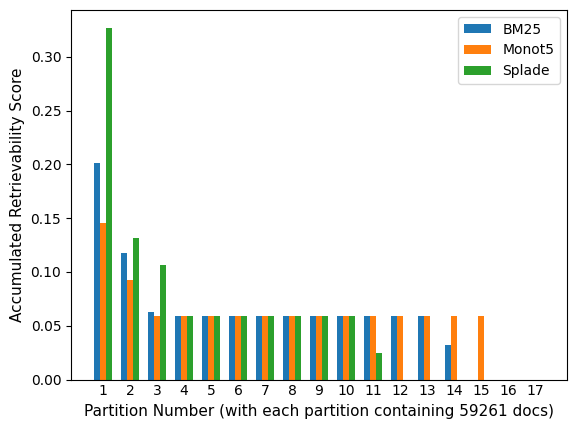

In [35]:
total_width, n = 0.7, 3
width = total_width / n
x = x_ticks
x = x - (total_width - width) / 2

plt.bar(x, bm25_scores,  width=width, label='BM25')
plt.bar(x + width, monot5_scores, width=width, label='Monot5')
plt.bar(x + 2 * width, splade_scores, width=width, label='Splade')

plt.tick_params(axis='x',length=0)
plt.xticks(ticks=x_ticks, labels=None)

plt.xlabel(f'Partition Number (with each partition containing {intv} docs)',fontsize=11)
plt.ylabel('Accumulated Retrievability Score',fontsize=11)
plt.legend()
plt.show()

In [36]:
# verify partition 4 about why the accumulated scores are the same
partition = 4
start = partition*intv

In [37]:
splade[splade['rtr_cnt'] == 1].shape

(450294, 3)

In [38]:
splade[start:start+intv]['rtr_score'].sum()

0.05862028033592834

In [39]:
bm25[start:start+intv]['rtr_score'].sum()

0.058621034169966495

In [40]:
monot5[start:start+intv]['rtr_score'].sum()

0.058621034169966495